In [1]:
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

import backtrader as bt


src_path = '/Users/yifeining/Documents/GitHub/triplec-quant-trading/src'
if src_path not in sys.path:
    sys.path.insert(0, src_path)
    
from models import *
from strategy import *

In [2]:
# class Screener_SMA(bt.Analyzer):
#     params = (('period',20), ('devfactor',2),)

#     def start(self):
#         self.bband = {data: bt.indicators.BollingerBands(data,
#                 period=self.params.period, devfactor=self.params.devfactor)
#                 for data in self.datas}

#     def stop(self):
#         self.rets['over'] = list()
#         self.rets['under'] = list()

#         for data, band in self.bband.items():
#             node = data._name, data.close[0], round(band.lines.bot[0], 2)
#             if data > band.lines.bot:
#                 self.rets['over'].append(node)
#             else:
#                 self.rets['under'].append(node)

# class SimpleMA(bt.Strategy):
#     def __init__(self):
#         self.sma = bt.indicators.SimpleMovingAverage(self.data, period=20, 
#                 plotname="20 SMA")

# #Instantiate Cerebro engine
# cerebro = bt.Cerebro(stdstats=True)

# #Set data parameters and add to Cerebro
# dir_path = '/Users/yifeining/Documents/GitHub/triplec-quant-trading'
# datapath = os.path.join(dir_path, 'data', 'survivorship-free', 'MSFT.csv')
# data1 = bt.feeds.YahooFinanceCSVData(
#     dataname=datapath,
#     fromdate=datetime.datetime(2018, 1, 1),
#     todate=datetime.datetime(2020, 1, 1),
#     date = 0,
#     open = 1,
#     high = 1,
#     low = 1,
#     close = 1,
#     volume = 5)
# cerebro.adddata(data1)

# cerebro.addstrategy(SimpleMA)
# #Run Cerebro Engine
# cerebro.run()
# cerebro.plot()

In [3]:
# load data
cerebro = bt.Cerebro()
# cerebro = bt.Cerebro(stdstats=False)
# cerebro.addobserver(bt.Observers.BuySell)

dir_path = '/Users/yifeining/Documents/GitHub/triplec-quant-trading'

datapath1 = os.path.join(dir_path, 'data', 'survivorship-free', 'MSFT.csv')
# datapath2 = os.path.join(dir_path, 'data', 'survivorship-free', 'GOOG.csv')

data1 = bt.feeds.YahooFinanceCSVData(
    dataname=datapath1,
    fromdate=datetime.datetime(2015, 1, 1),
    todate=datetime.datetime(2015, 12, 1),
#     reverse = True
    adjclose = False
    )
cerebro.adddata(data1)

# data2 = bt.feeds.YahooFinanceCSVData(
#     dataname=datapath2,
#     fromdate=datetime.datetime(2015, 1, 1),
#     todate=datetime.datetime(2015, 12, 1),
#     reverse=False)

# data2.compensate(data1)  # let the system know ops on data1 affect data0
# data2.plotinfo.plotmaster = data1
# data2.plotinfo.sameaxis = True
# cerebro.adddata(data2)

In [4]:


# Add a strategy
cerebro.addstrategy(TestStrategy)



# Set our desired cash start
cerebro.broker.setcash(2000.0)

# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.PercentSizer, percents = 9)


# Set the commission - 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)

print('Initial Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run over everything
cerebro.run()

# cerebro.run(runonce=False, stdstats=False, writer=True)


Initial Portfolio Value: 2000.00
51.75 51.93 52.33 0.0 =====
2015-01-02, Close, 43.34
2015-01-05, Close, 42.94
2015-01-05, BUY CREATE, 42.94
2015-01-06, BUY EXECUTED, Price: 42.99, Cost: 180.21, Comm 0.18
2015-01-06, Close, 42.32
2015-01-07, Close, 42.85
2015-01-08, Close, 44.11
2015-01-09, Close, 43.74
2015-01-12, Close, 43.20
2015-01-13, Close, 42.97
2015-01-13, SELL CREATE, 42.97
2015-01-14, SELL EXECUTED, Price: 42.60, Cost: 180.21, Comm 0.18
2015-01-14, OPERATION PROFIT, GROSS -1.63, NET -1.99
2015-01-14, Close, 42.60
2015-01-14, BUY CREATE, 42.60
2015-01-15, BUY EXECUTED, Price: 42.84, Cost: 180.83, Comm 0.18
2015-01-15, Close, 42.16
2015-01-16, Close, 42.86
2015-01-20, Close, 43.00
2015-01-21, Close, 42.57
2015-01-22, Close, 43.69
2015-01-23, Close, 43.73
2015-01-23, SELL CREATE, 43.73
2015-01-26, SELL EXECUTED, Price: 43.57, Cost: 180.83, Comm 0.18
2015-01-26, OPERATION PROFIT, GROSS 3.08, NET 2.72
2015-01-26, Close, 43.58
2015-01-27, Close, 39.54
2015-01-27, BUY CREATE, 39.54


<IPython.core.display.Javascript object>


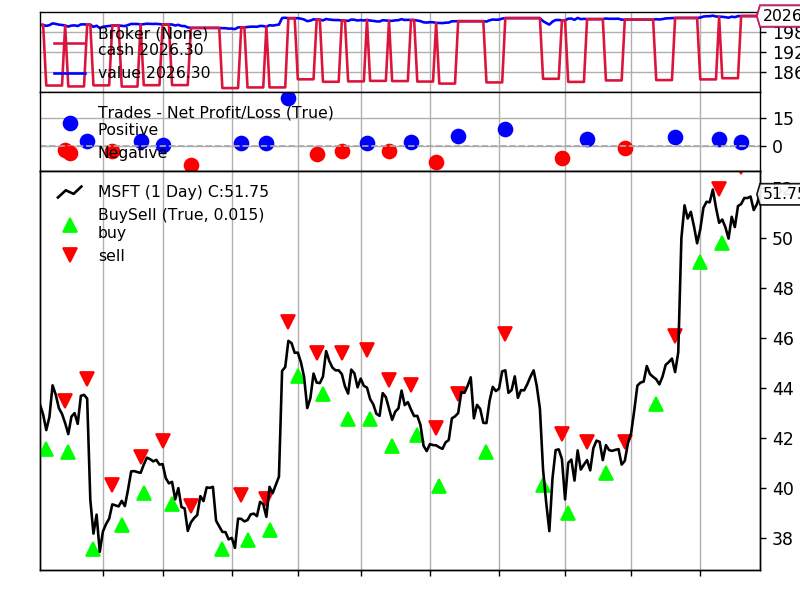

In [5]:
cerebro.plot();


In [6]:
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Final Portfolio Value: 2026.30
